In [14]:
import os

import numpy as np
import pandas as pd
import scipy as sp
    
import matplotlib.pyplot as plt

In [4]:
os.chdir(r"C:\Users\05669\Desktop")

In [5]:
waves = pd.read_csv("waves1.csv")

In [7]:
waves.head()

,x,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0,250,1705.852744,2199.640043,2689.587144,2904.527550,3001.857328,3050.767321,2969.253776,3050.506741,...,2791.071343,2738.912219,2647.497793,2670.321082,2725.216395,2798.719747,2888.741655,2979.815898,3026.707474,2911.19836
1,1,250,1527.319072,2047.487212,2602.333041,2880.585824,2998.605251,3050.650733,2969.252642,3050.506739,...,2791.071343,2738.912219,2647.497793,2670.321082,2725.216395,2798.719747,2888.741655,2979.815898,3026.707474,2911.19836
2,2,250,1347.334847,1879.682502,2494.225369,2846.347090,2993.206072,3050.418730,2969.249908,3050.506730,...,2791.071343,2738.912219,2647.497793,2670.321082,2725.216395,2798.719747,2888.741655,2979.815898,3026.707474,2911.19836
3,3,250,1171.820577,1700.666469,2364.659449,2798.983632,2984.535299,3049.972156,2969.243538,3050.506706,...,2791.071343,2738.912219,2647.497793,2670.321082,2725.216395,2798.719747,2888.741655,2979.815898,3026.707474,2911.19836
4,4,250,1006.261078,1515.933934,2214.452963,2735.606498,2971.065805,3049.140669,2969.229177,3050.506641,...,2791.071343,2738.912219,2647.497793,2670.321082,2725.216395,2798.719747,2888.741655,2979.815898,3026.707474,2911.19836


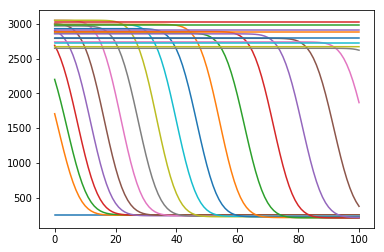

In [13]:
for col in waves.columns[1:]:
    plt.plot(waves[col])

In [16]:
x0 = pd.read_csv("x0s.csv")

In [24]:
x0.head()

,t,x0
0,0,0.000000
1,1,1.365959
2,2,3.980308
3,3,7.284443
4,4,10.833032


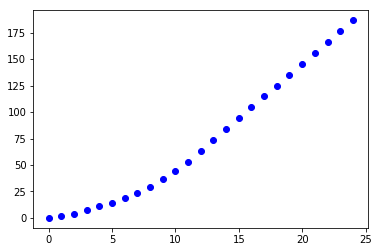

In [22]:
plt.plot(x0["x0"], "bo")

In [44]:
v = time_deriv(x0["x0"], x0["t"])
x0["v"] = v
dvdt = time_deriv(x0["v"], x0["t"])
x0["dvdt"] = dvdt
x0.head()

,t,x0,v,dvdt
0,0,0.000000,0.000000,0.000000
1,1,1.365959,1.365959,1.365959
2,2,3.980308,2.614350,1.248391
3,3,7.284443,3.304134,0.689785
4,4,10.833032,3.548590,0.244455


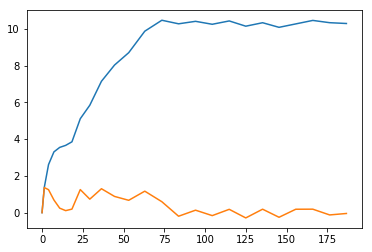

In [48]:
for col in ["v", "dvdt"]:
    plt.plot(x0["x0"], x0[col])

In [88]:
def moving_avg(x, window):
    
    curr = len(x)
    if window > curr:
        print("window wider than current data")
    avg = np.average(x[curr:curr-window-1:-1])
    
    return avg

moving_avg(x0["dvdt"], 5)

-0.008372419999989233

In [107]:
def moving_avg_np(x, window):
    
    for i in range(len(x)):
        if window > i:
            print("window wider than current data")
            continue
        print(np.average(x[i-window:i:1]))
    
moving_avg_np(x0["dvdt"], 5)

window wider than current data
window wider than current data
window wider than current data
window wider than current data
window wider than current data
0.709717912
0.731823082
0.4972606027999998
0.49856222240000037
0.5074810667999998
0.7188809340000006
0.873381634
0.9691769860000001
0.9519532219999988
0.9241420020000006
0.6250756439999996
0.47547100799999953
0.3089694179999995
0.11149975799999937
-0.06469286999999468
0.011743129999993584
-0.06529404399999805
0.003984870000002161
0.005652680000000032
0.03811309999999253


In [ ]:
while True:
    for col in waves.columns[1:]:
        #fit column, obtain x0
        pass
    
    v = time_deriv(x0["x0"], x0["t"])
    x0["v"] = v
    dvdt = time_deriv(x0["v"], x0["t"])
    x0["dvdt"] = dvdt
    x0.head()

In [124]:
def wave_generator(upper, lower, sigma, v_final, v_acc, t_step=1, x_range=100):
    
    x = [pos for pos in range(x_range)]
    t = 0
    v = 0
    x0 = 0
    
    upper_adj = random_fluxor(upper)
    lower_adj = random_fluxor(lower)
    sigma_adj = random_fluxor(sigma)
    
    v = vel_generator(v, v_final, v_acc)
    
    return v
wave_generator(1200, 250, 30, 10, 1.5)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


1.2551391373973444

In [140]:
def random_fluxor(x):
    return x*(1+(np.random.random()-0.5)/10)

In [123]:
def vel_generator(v, v_final, v_acc):
    if v < v_final:
        v = v+v_acc*np.random.random()
        return v
    else:
        v = v_final*(1+np.random.random()/20)
    return v

In [41]:
def time_deriv(x, t):
    deriv = []
    for i in range(len(x)):
        if i == 0:
            deriv.append(0)
            continue
        dx = (x[i] - x[i-1])
        dt = (t[i] - t[i-1])
        dxdt = dx/dt
        deriv.append(dxdt)
    return deriv